<a href="https://colab.research.google.com/github/zaranindita/modular-expo/blob/main/modularexpo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def modular_exponentiation_iterative(base, exponent, modulus):
    result = 1
    base = base % modulus  # jika base lebih besar dari modulus
    while exponent > 0:
        # jika eksponen ganjil, kalikan dengan hasil
        if exponent % 2 == 1:
            result = (result * base) % modulus
        # eksponen dibagi 2
        exponent = exponent // 2
        # basis dikalikan dengan dirinya sendiri
        base = (base * base) % modulus
    return result


In [2]:
def modular_exponentiation_recursive(base, exponent, modulus):
    if exponent == 0:
        return 1
    base = base % modulus
    # jika eksponen ganjil
    if exponent % 2 == 1:
        return (base * modular_exponentiation_recursive(base, exponent - 1, modulus)) % modulus
    else:
        # jika eksponen genap
        half = modular_exponentiation_recursive(base, exponent // 2, modulus)
        return (half * half) % modulus


+------------+----------------------+----------------------+
|   eksponen |   waktu iteratif (s) |   waktu rekursif (s) |
+============+======================+======================+
|         20 |          5.00679e-06 |          7.15256e-06 |
+------------+----------------------+----------------------+
|         40 |          2.86102e-06 |          5.00679e-06 |
+------------+----------------------+----------------------+
|         60 |          2.38419e-06 |          5.24521e-06 |
+------------+----------------------+----------------------+
|         80 |          2.38419e-06 |          2.6226e-06  |
+------------+----------------------+----------------------+
|        120 |          2.14577e-06 |          3.57628e-06 |
+------------+----------------------+----------------------+


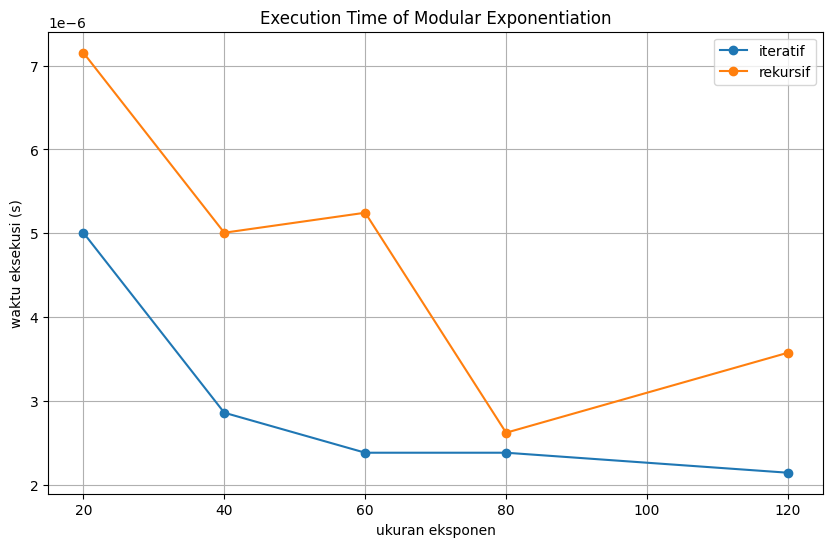

In [49]:
import time
import matplotlib.pyplot as plt
from tabulate import tabulate

def measure_execution_time():
    base = 2
    modulus = 1000000007
    eksponen = [20, 40, 60, 80, 120]

    waktu_iteratif = []
    waktu_rekursif = []

    results = []

    for exponent in eksponen:
        # waktu itertif
        start_iterative = time.time()
        modular_exponentiation_iterative(base, exponent, modulus)
        end_iterative = time.time()
        iterative_time = end_iterative - start_iterative
        waktu_iteratif.append(iterative_time)

        # waktu rekusrsif
        start_recursive = time.time()
        modular_exponentiation_recursive(base, exponent, modulus)
        end_recursive = time.time()
        recursive_time = end_recursive - start_recursive
        waktu_rekursif.append(recursive_time)

        results.append([exponent, f"{iterative_time}", f"{recursive_time}"])


    print(tabulate(results, headers=["eksponen", "waktu iteratif (s)", "waktu rekursif (s)"], tablefmt="grid"))


    plt.figure(figsize=(10, 6))
    plt.plot(eksponen, waktu_iteratif, label='iteratif', marker='o')
    plt.plot(eksponen, waktu_rekursif, label='rekursif', marker='o')
    plt.xlabel('ukuran eksponen')
    plt.ylabel('waktu eksekusi (s)')
    plt.title('Execution Time of Modular Exponentiation')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    measure_execution_time()

